# Linear Algebra

In this notebook, you will:

* Perform linear algebra operations using NumPy.
* Compare the efficiency of different approaches (for loops, apply, NumPy primitives) for vectorized operations.
* Use timing functions to measure the performance of each approach.

In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

Addition, scalar multiplication, and multiplication

In [11]:
arr = np.arange(1, 13)

reshaped_matrix = arr.reshape(3, 4)


In [12]:
# DATACASTING-- u r casting it to a diff representation, which r diff based on how much space they take up
int_array = np.array([1, 0, 3, 5])

float_array = int_array.astype(float)
# If 0--> False, if ≠ 0--> True 
bool_array = int_array.astype(bool)

print("Original array (int):")
print(int_array)

print("\nArray cast to float:")
print(float_array)


print("\nArray cast to boolean:")
print(bool_array)

Original array (int):
[1 0 3 5]

Array cast to float:
[1. 0. 3. 5.]

Array cast to boolean:
[ True False  True  True]


In [15]:
int_array = np.array([1, 0, 3, 5]).astype(np.int16)
int_array.nbytes, arr.nbytes #--> why take up more space than u have to? 


(8, 96)

In [16]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[1], [2], [3]])

# Matrix multiplication using NumPy
result = np.dot(A, B)
print("Matrix multiplication result (A x B):")
print(result)

# Transpose of a matrix
A_transpose = A.T # rows to columns 
print("\nTranspose of matrix A:")
print(A_transpose)

Matrix multiplication result (A x B):
[[14]
 [32]
 [50]]

Transpose of matrix A:
[[1 4 7]
 [2 5 8]
 [3 6 9]]


## Below find a collection of useful expressions.
(Won't go over, test on own time)

In [17]:
# 1. Create NumPy Arrays
# Create a 1D array
array_1d = np.array([1, 2, 3, 4, 5])
print("1D array:", array_1d)

# Create a 2D array (matrix)
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("2D array:\n", array_2d)

1D array: [1 2 3 4 5]
2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
# 2. Basic Array Operations
# Element-wise addition, subtraction, multiplication, and division
array_sum = array_1d + 2  # Add 2 to each element
array_mul = array_1d * 3  # Multiply each element by 3
print("Array after addition:", array_sum)
print("Array after multiplication:", array_mul)

Array after addition: [3 4 5 6 7]
Array after multiplication: [ 3  6  9 12 15]


In [19]:
# 3. Matrix Multiplication
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

matrix_mul = np.dot(matrix_a, matrix_b)  # Matrix multiplication using dot product
print("Matrix A:\n", matrix_a)
print("Matrix B:\n", matrix_b)
print("Matrix multiplication (A dot B):\n", matrix_mul)

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]
Matrix multiplication (A dot B):
 [[19 22]
 [43 50]]


In [20]:
# 4. Array Slicing and Indexing
# Access specific rows, columns, or elements
print("First row of 2D array:", array_2d[0])       # First row
print("First column of 2D array:", array_2d[:, 0]) # First column
print("Element at position (1,1):", array_2d[1, 1])  # Element at (1,1)

First row of 2D array: [1 2 3]
First column of 2D array: [1 4 7]
Element at position (1,1): 5


In [21]:
# 5. Broadcasting 
# Apply operations on arrays of different shapes
array_1d_broad = np.array([1, 2, 3])
array_2d_broad = np.array([[4], [5], [6]])

broadcast_result = array_1d_broad + array_2d_broad
print("Broadcasting result:\n", broadcast_result)

Broadcasting result:
 [[5 6 7]
 [6 7 8]
 [7 8 9]]


# Sampling
Won't go over, look over your own time

In [22]:
# Uniform Distribution
random_uniform = np.random.rand(5)  # 5 random numbers between 0 and 1
print("Random numbers from uniform distribution:", random_uniform)

# Normal distribution (mean=0, std=1)
random_normal = np.random.randn(5)  # 5 random numbers from a standard normal distribution
print("Random numbers from normal distribution:", random_normal)

# Random integers with range
random_integers = np.random.randint(10, 100, size=5)  # 5 random integers between 10 and 100
print("Random integers between 10 and 100:", random_integers)

# Random sampling from a 1D array
array = np.array([10, 20, 30, 40, 50])
random_sample = np.random.choice(array, size=3, replace=False)  # Random sample of 3 elements without replacement
print("Random sample from array:", random_sample)

# 5. Generating random permutations of arrays
random_permutation = np.random.permutation(array)  # Generate a random permutation of the array
print("Random permutation of the array:", random_permutation)

Random numbers from uniform distribution: [0.81037034 0.76903594 0.87957041 0.5623857  0.73899822]
Random numbers from normal distribution: [-0.47692627 -1.54555885 -0.61111741  1.42545643  0.30063216]
Random integers between 10 and 100: [26 90 17 86 31]
Random sample from array: [50 20 10]
Random permutation of the array: [50 10 20 40 30]


# Benchmarking Time

In [38]:
data = np.random.rand(1000000)

start_time = time.time()

squared_for_loop = []
for x in data:
    squared_for_loop.append(x ** 2)

end_time = time.time()
for_loop_time = end_time - start_time
%time
print(f"Time taken using a for loop: {for_loop_time:.4f} seconds")

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 6.91 µs
Time taken using a for loop: 0.1321 seconds


In [39]:
df = pd.DataFrame(data, columns=['Values'])
df
# start_time = time.time()

# squared_apply = df['Values'].apply(lambda x: x ** 2)

# end_time = time.time()
# apply_time = end_time - start_time

# print(f"Time taken using Pandas apply(): {apply_time:.4f} seconds")

,Values
0,0.607997
1,0.322831
2,0.417690
3,0.052735
4,0.040404
...,...
999995,0.182740
999996,0.812691
999997,0.205615
999998,0.013003


In [28]:
start_time = time.time()

# Calculate the square of each element using NumPy vectorized operation
squared_numpy = np.square(data)

end_time = time.time()
numpy_time = end_time - start_time

print(f"Time taken using NumPy vectorization: {numpy_time:.4f} seconds")

## WAYYYYY FASTER

Time taken using NumPy vectorization: 0.0056 seconds


# Your turn | Part 1

#### Using np.random.rand, create a 1000 x 1000 matrix, and square every element using a forloop, pandas, and numpy. Benchmark its speed.

In [4]:
# your code (there should be copying and pasting here)
start_time = time.time()

data = np.random.rand(1000, 1000)
np.square(data)


end_time = time.time()
numpy_time = end_time - start_time
numpy_time

0.01866006851196289

In [5]:
start_time = time.time()

df = pd.DataFrame(data)
df.map(lambda x: x**2) 
    

end_time = time.time()
p_time = end_time - start_time
p_time

0.17517614364624023

In [12]:
squared_matrix = np.zeros((1000, 1000))

for i in range(data.shape[0]):  # Iterate over rows
    for j in range(data.shape[1]):  # Iterate over columns
        squared_matrix[i, j] = data[i, j] ** 2

end_time = time.time()
for_loop_time = end_time - start_time
%time
print(f"Time taken using a for loop: {for_loop_time:.4f} seconds")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs
Time taken using a for loop: 101.1547 seconds


#### Using the code above, write a function that creates two random matrix (i.e. A and B) of size S x S and multiplies them. 

In [56]:
import numpy as np

In [ ]:
# your code

def func(S):
    a = np.random.rand(S,S)
    b = np.random.rand(S,S)

    dot = np.dot(a,b)
    return dot

func(1000000)

What happens when you make the size 1000? 1,000,000? 100,000,000? 

### Computing Distances
Write a numpy-based function that calculates a) the Euclidean distance between two points and b)the Manhattan distance. No cheating and using built-in functions.

In [15]:
# Use these points to test
point1 = np.array([1, 2])
point2 = np.array([4, 6])

In [16]:
# your code for Euclidean

def find_euclidean(point1, point2):
    return np.sum(np.square(point2-point1)) ** 0.5
find_euclidean(point1, point2)

5.0

In [ ]:
# your code for Manhattan

# Part Two | Understanding regression
In this section we will simulate regression data, and then inverse calculate the betas. (This may stretch to the next class). The goal is to get you thinking in matrices instead of numbers.

$y = \beta_0 + \beta_1 x + \epsilon$ where $\epsilon \in N(0,10)$

Generate a thousand points based on this model, then make a scatter plot using plt.scatter or sns.regplot

In [17]:
# True parameters of the linear model


In [92]:
# your code
beta_0 = 5   # Intercept
beta_1 = 3   # Slope
e = np.random.normal(0, 10, 1000)
arr = np.random.randint(0,100, size = 1000)
for es in e: 
    y = (arr*beta_0) + beta_1 + e 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


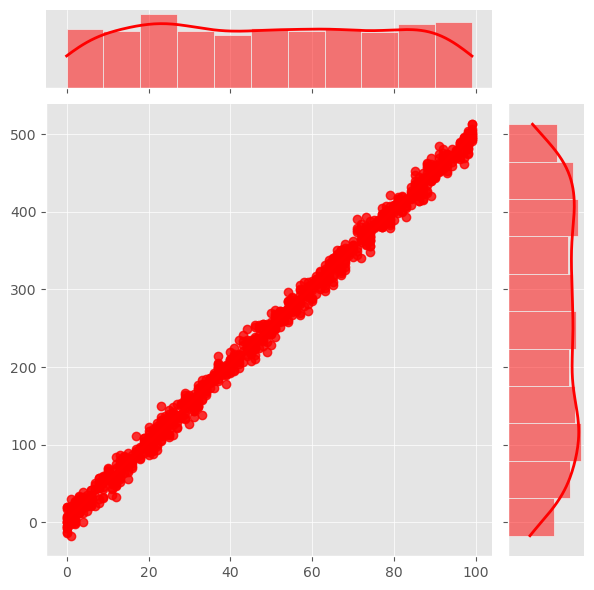

In [93]:
sns.jointplot(x = arr,y = y, scatter = True, kind = 'reg',color = 'r')
plt.style.use('ggplot')

#### Generalize this to a function that takes in n (the number of points), the slope (b1), and intercept (b0). It should return x and y.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


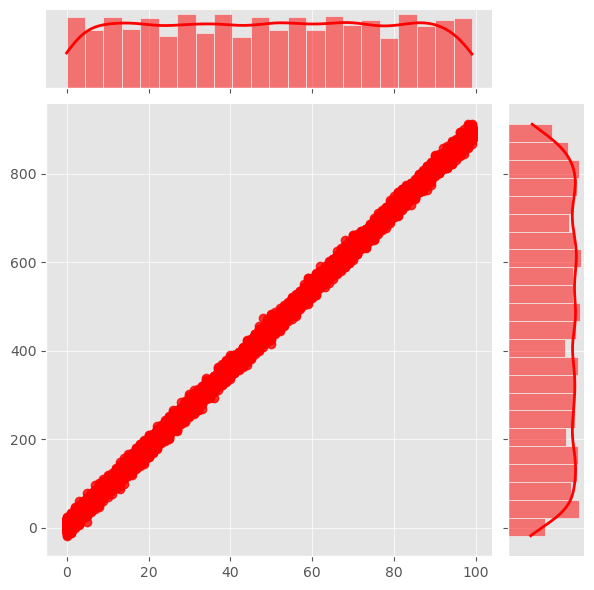

In [101]:
def regpractice(n,b1,b0):

    e = np.random.normal(0, 10, n)
    x = np.random.randint(0,100, size = n)
    for es in e: 
        y = (x*b1) + b0 + e 
    return x,y
data = regpractice(10000,9,3)
sns.jointplot(x = data[0],y = data[1], scatter = True, kind = 'reg',color = 'r')
plt.style.use('ggplot')

Inverse computation: Due to the availability of derivaties, an exact solution can be found for the $\beta$ values. Using the following equations to calculate the beta values.

$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

    
$\beta_0 = \bar{y} - \beta_1 \bar{x}$


In [119]:
# your code

def regpractice(n,b1,b0):

    e = np.random.normal(0, 10, n)
    x = np.random.randint(0,100, size = n)
    for es in e: 
        y = (x*b1) + b0 + e 
    return x,y
data = regpractice(10000,9,3)

def inverse(x,y):
    b1 = round((np.std(x)*np.std(y))/(np.var(x) ),2)
    b0 = round((np.mean(y))-b1*(np.mean(x)),2)
    return (f'We inversely calculated b1 = {b1}, b0 = {b0}.')
    
print(inverse(data[0], data[1]))

We inversely calculated b1 = 9.01, b0 = 2.33.


### Challenge: What happens when you increase the sample size? Calculate the error of your estimated $\beta_1$ to the real $\beta_1$ and plot your error as the sample size increases.